# Bank Customer Churn Prediction
In this kernel I am going to make an __Exploratory Data Analysis (EDA)__ on [this](https://www.kaggle.com/filippoo/deep-learning-az-ann) dataset. 
### Outlines:
* __Importing Necessary Packages__
* __Statistical Summary of the Dataset__
* __Dropping Irrelevant Features__
* __Data Visualization__
* __Detecting Outliers using Boxplot__
* __Checking Correlation with Heatmap__
* __Different ML predictive models__
    * Gaussian Naive Bayes
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * Extra Gradient Boosting Tree (XGBoost)
* __Improve the Predictive Model__
    * Feature Scaling
    * Over Sampling

### Importing Necessary Packages

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

In [80]:
# read dataset
dataset = pd.read_csv("bank_Churn_Modelling.csv")

In [81]:
# first five row of the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### __The statistical summary of the dataset__

In [82]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [83]:
# checking datatypes and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Dropping Irrelevant Feature
`RowNumber`, `CustomerId` and `Surname` are irrelivant, so we drop those features.

In [84]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

## EDA and Data Visualization 

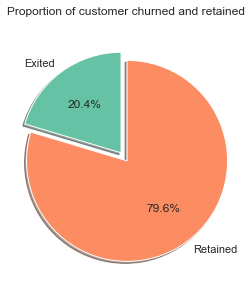

In [85]:
df = dataset
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained")
plt.show()

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

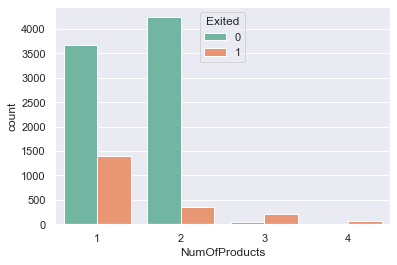

In [86]:
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

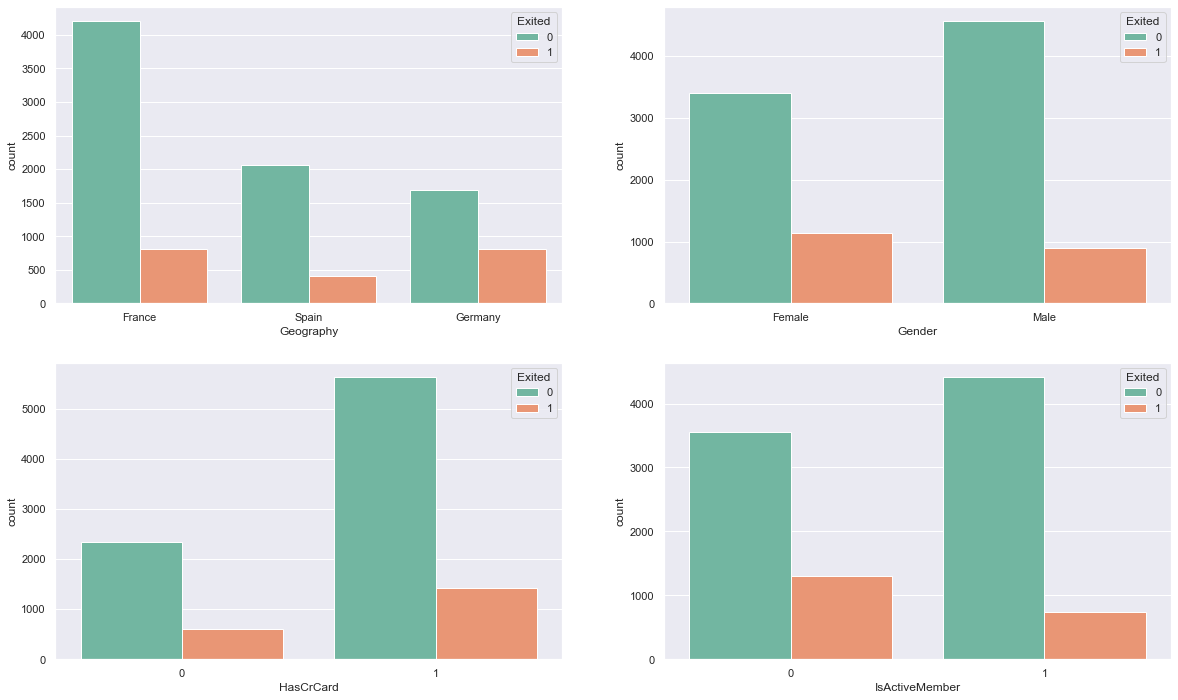

In [87]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

__Customer with 3 or 4 products are higher chances to Churn__

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

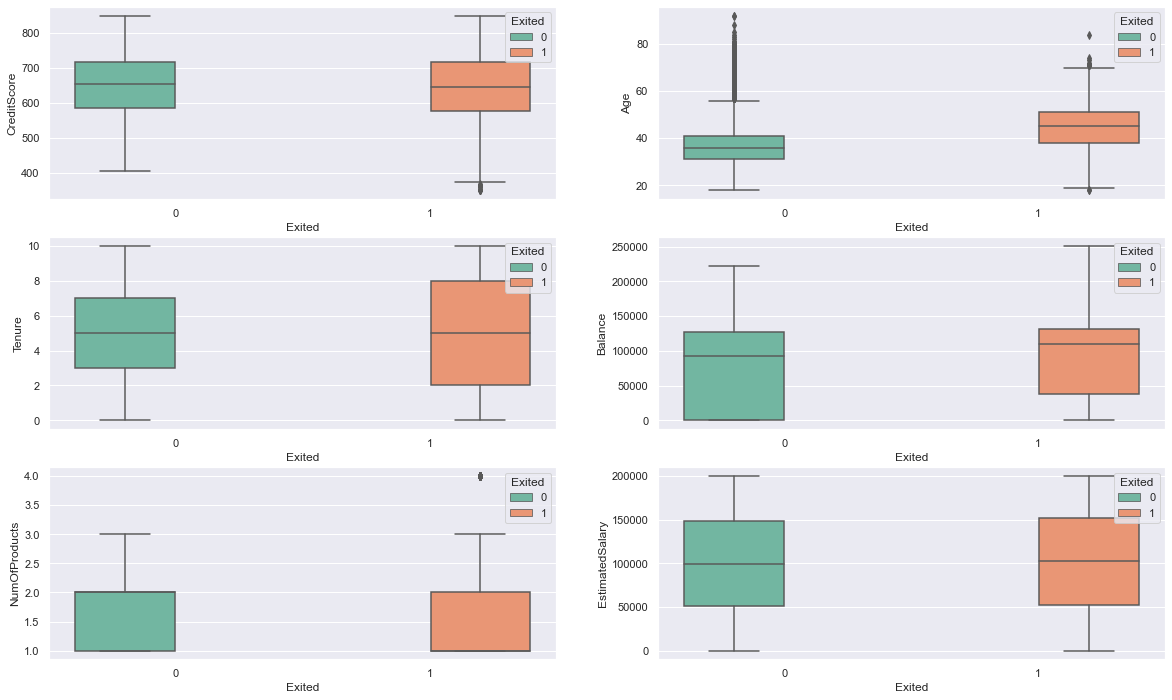

In [88]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

We note the following:

- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
- With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
- Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
- Neither the product nor the salary has a significant effect on the likelihood to churn.

In [89]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


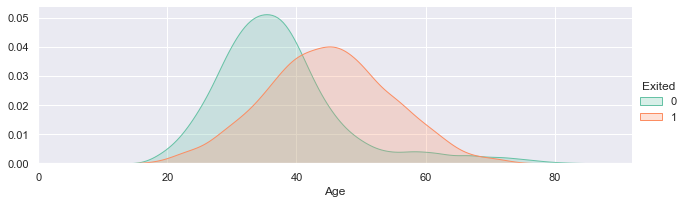

In [90]:
#kernel density estimate plot
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()

plt.show()

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

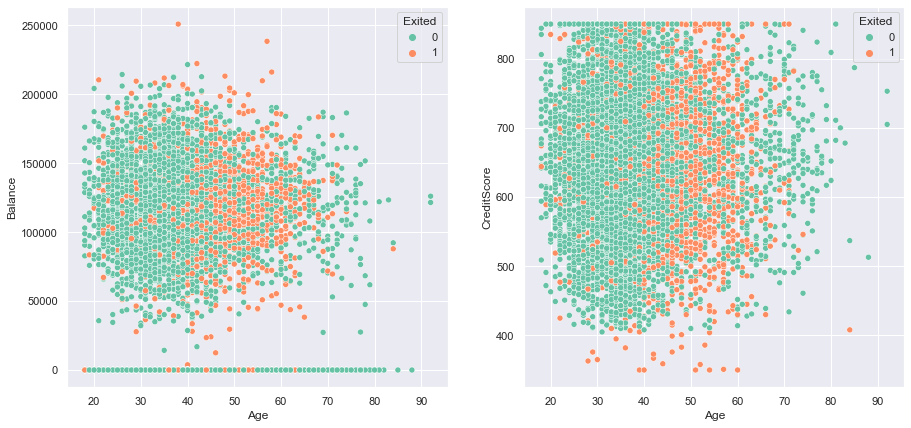

In [91]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1])

* __40 to 70 years old customers are higher chances to churn__
* __Customer with `CreditScore` less then `400` are higher chances to churn__

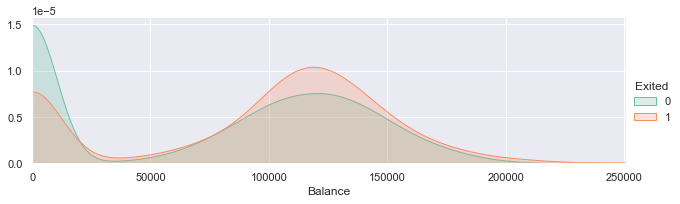

In [92]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()

plt.show()

### __Detecting Outliers using Boxplot__

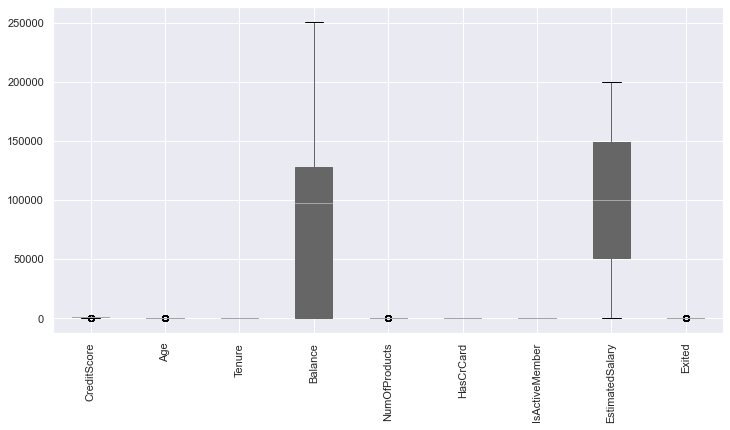

In [93]:
plt.figure(figsize=(12,6))
bplot = dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

### __Checking Correlation__

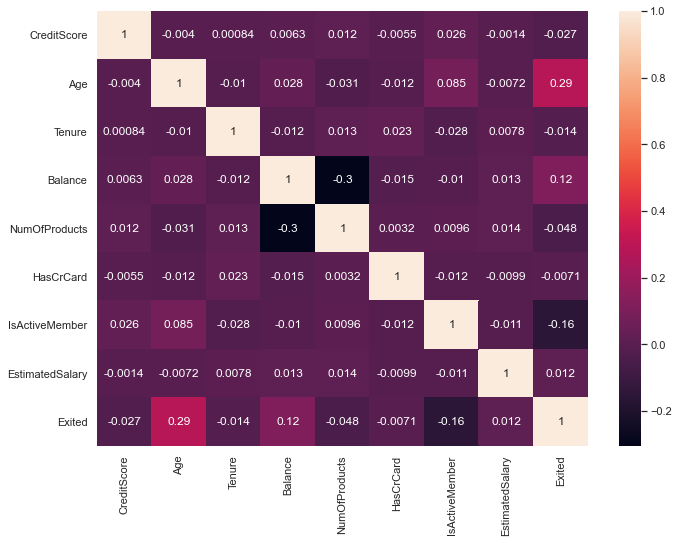

In [94]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## Prediction with ML models:

## Label Encoding

In [95]:
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

In [96]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [97]:
result = dataset[dataset['Exited'] ==1]
result.shape

(2037, 11)

result1= X_res[X_res['Exited'] ==1]
result1 

In [98]:
X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 20.4
% Positive class in Test  = 20.25


In [101]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [102]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.784

In [103]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.789

In [104]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.7885

In [105]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.864

In [106]:
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.84

## Scaling/ Normalization

In [107]:
scaler = MinMaxScaler() 
bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']
df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

In [108]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [109]:
df_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735
1,0.516,2,0,0.310811,1,0.334031,1,0,1,0.562709
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120
4,1.000,2,0,0.337838,2,0.500246,1,1,1,0.395400


In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']
standard = pd.DataFrame(data = X)
standard[bumpy_features] = scaler.fit_transform(X[bumpy_features])

In [144]:
standard.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276


In [110]:
df_scaled.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.601058,0.746300,0.545700,0.282727,5.012800,0.304848,1.530200,0.70550,0.515100,0.500441
std,0.193307,0.827529,0.497932,0.141727,2.892174,0.248696,0.581654,0.45584,0.499797,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,0.468000,0.000000,0.000000,0.189189,3.000000,0.000000,1.000000,0.00000,0.000000,0.254977
50%,0.604000,0.000000,1.000000,0.256757,5.000000,0.387402,1.000000,1.00000,1.000000,0.500960
75%,0.736000,1.000000,1.000000,0.351351,7.000000,0.508749,2.000000,1.00000,1.000000,0.746955
max,1.000000,2.000000,1.000000,1.000000,10.000000,1.000000,4.000000,1.00000,1.000000,1.000000


## Over Sampling for Data Imbalance

pip install imblearn


pip install imbalanced-learn

### SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [145]:
from imblearn.over_sampling import SMOTE
X = standard
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)

In [146]:
X.shape, y.shape ,X_res.shape,y_res.shape

((10000, 10), (10000,), (15926, 10), (15926,))

In [147]:
print('\nBalance of positive and negative classes (%):')
y.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


0    79.63
1    20.37
Name: Exited, dtype: float64

In [149]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.8932831136220967
Precision: 0.9052496798975672
Recall: 0.8804483188044832
F1: 0.8926767676767677
Area under precision (AUC) Recall: 0.8572892122481022


In [150]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy_score(y_pred,y_test))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8782172002510985
Precision: 0.8782608695652174
Recall: 0.8804483188044832
F1: 0.8793532338308457
Area under precision (AUC) Recall: 0.8335269595644517


In [127]:
from imblearn.over_sampling import SMOTE
X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)

In [128]:
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 49.9
% Positive class in Test  = 50.41


In [129]:
X.shape

(10000, 10)

In [130]:
X_res.shape

(15926, 10)

In [131]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.8885750156936597
Precision: 0.9012187299550994
Recall: 0.8748443337484434
F1: 0.8878357030015798
Area under precision (AUC) Recall: 0.8515146116102419


In [134]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy_score(y_pred,y_test))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8750784682988073
Precision: 0.8719211822660099
Recall: 0.8816936488169365
F1: 0.876780185758514
Area under precision (AUC) Recall: 0.8284032757664297


## ADASYN: Adaptive Synthetic Sampling Approach


ADASYN is a generalized form of the SMOTE algorithm. 
- This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn


In [135]:
from imblearn.over_sampling import ADASYN
X = df_scaled
ad  = ADASYN(random_state=130)
ax_res, ay_res = ad.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(ax_res, ay_res, test_size= 0.2, random_state=7)

In [136]:
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 51.81
% Positive class in Test  = 51.68


In [137]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.906145927944293
Precision: 0.9165175909361956
Recall: 0.9004100761570006
F1: 0.9083924349881797
Area under precision (AUC) Recall: 0.8767100359491558


In [138]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.877989706327581

## Hybrid Smote EEN

In [139]:
from imblearn.combine import SMOTEENN
X = df_scaled
enn  = SMOTEENN()
ax_res, ay_res = ad.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(ax_res, ay_res, test_size= 0.2, random_state=7)

In [140]:
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 51.81
% Positive class in Test  = 51.68


In [141]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.906145927944293
Precision: 0.9165175909361956
Recall: 0.9004100761570006
F1: 0.9083924349881797
Area under precision (AUC) Recall: 0.8767100359491558


In [142]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.877989706327581

In [177]:
clf.feature_importances_

array([0.113014  , 0.03916395, 0.03384053, 0.28143021, 0.07075021,
       0.12579905, 0.13798266, 0.01632775, 0.06581588, 0.11587576])